# CS-671, Fall 2025 - HW 1, Q2

## StarterCode Setup

### Importing Libraries

In [1]:
import numpy as np
from numpy.linalg import norm
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

### Loading Dataset, Splitting Data into Train and Test sets

In [ ]:
bcd = load_breast_cancer()
X = bcd.data
y = bcd.target
y = 1 - y

# Split the dataset with a fixed random seed (random_state=42)
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)


(455, 30) (114, 30) (455,) (114,)


## Q2 (b): Implement a k-NN algorithm from scratch to classify the dataset. Use `k = 31` and the `euclidean` distance, and __make sure to normalize the data__. Report your model’s F1 score on the test set.

In [27]:
# normalizing the data
def normalize_data(X):
    for i in range(len(X)):
        X[i] = (X[i] - min(X[i])) / (max(X[i]) - min(X[i]))
    return X

X_train_norm = normalize_data(X_train)
X_test_norm = normalize_data(X_test)

In [45]:
# euclidean distance
def euclidean_distance(x1, x2):
    ret = 0
    for i in range(len(x1)):
        ret += (x1[i]-x2[i]) ** 2
    return np.sqrt(ret)

def cosine_similarity(x1, x2):
    return np.dot(x1, x2) / (np.linalg.norm(x1) * np.linalg.norm(x2))

def knn_predict(X_train, y_train, X_test, k, dist_func):
    predictions = []
    for x in X_test:
        if dist_func == 'euclidean':
            distances = [euclidean_distance(x, x_train) for x_train in X_train]
        elif dist_func == 'cosine':
            distances = [cosine_similarity(x, x_train) for x_train in X_train]
        else:
            raise ValueError("Invalid distance function")
        k_nearest = np.argsort(distances)[:k]
        k_nearest_labels = [y_train[i] for i in k_nearest]
        predictions.append(np.argmax(np.bincount(k_nearest_labels)))
    return predictions

In [46]:
predictions = knn_predict(X_train_norm, y_train, X_test_norm, 31, 'euclidean')

In [60]:
def f1_score(y_true, y_pred):
    tp = 0
    fp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
        elif y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
    
    # Handle edge cases to avoid division by zero
    if tp + fp == 0:
        precision = 0
    else:
        precision = tp / (tp + fp)
    
    if tp + fn == 0:
        recall = 0
    else:
        recall = tp / (tp + fn)
    
    if precision + recall == 0:
        return 0
    else:
        return 2 * precision * recall / (precision + recall)

f1_score(y_test, predictions)

0.821917808219178

## Q2 (c): Use cross-validation with 5 folds and the F1 score to tune the value of k and the distance function used (possible distance functions to use could be Euclidean distance, Manhattan distance, or cosine similarity). Make sure to use at least five values of k between 1 and 63, and try at least two distance functions. For each distance function, show a plot where the x-axis depicts the value of k and the y-axis depicts the average F1 score for that value of k during cross-validation. Which pair of parameters performed the best? Note: You may find the array split method from NumPy helpful when implementing cross-validation.

In [65]:
ks = [2, 5, 8, 15, 22, 30, 38, 45, 52, 63]

# Returns the average f1 score for given k and distance function
def cross_validation(X, y, k, dist_func):
    X_folds = np.array_split(X, k)
    y_folds = np.array_split(y, k)
    performance = 0

    for i in range(k):
        X_train = np.concatenate(X_folds[:i] + X_folds[i+1:])
        y_train = np.concatenate(y_folds[:i] + y_folds[i+1:])
        X_test = X_folds[i]
        y_test = y_folds[i]

        predictions = knn_predict(X_train, y_train, X_test, k, dist_func)


        loss = f1_score(y_test, predictions)
        performance += loss

    return performance / k


# Plot Euclidean Distance

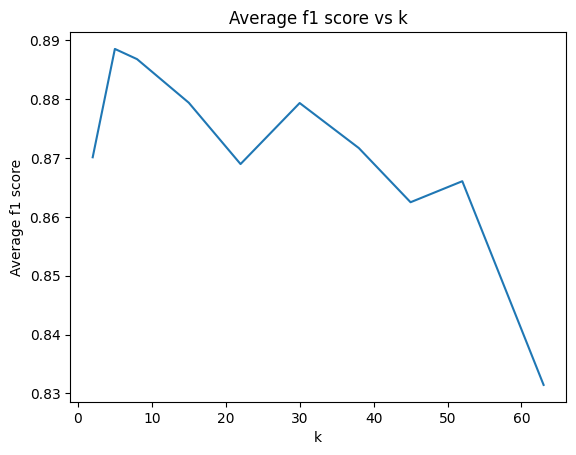

In [ ]:
f1s = []
for k in ks:
    f1s.append(cross_validation(X_train_norm, Y_train_norm, k, 'euclidean'))

plt.plot(ks, f1s)
plt.xlabel('k')
plt.ylabel('Average f1 score')
plt.title('Average f1 score vs k for Euclidean Distance')
plt.show()

# Plot 

## Q2 (d): Using the best parameters determined in part (c), report the performance of a k-NN classifier on the test set. Compare this to your model in part (b). Is it as you expected?

In [ ]:
best_preds = 

## Q2 (e -> i): Using the test dataset and the same parameters as part (c), plot the ROC curve of your classifier as points connected by lines. You may implement the ROC curve computation using either of the two methods discussed in the HW PDF

In [ ]:
def tpr(y_true, y_pred):
    tp = 0
    fn = 0
    for i in range(len(y_true)):
        if y_true[i] == 1 and y_pred[i] == 1:
            tp += 1
        elif y_true[i] == 1 and y_pred[i] == 0:
            fn += 1
    return tp / (tp + fn)

def fpr(y_true, y_pred):
    fp = 0
    tn = 0
    for i in range(len(y_true)):
        if y_true[i] == 0 and y_pred[i] == 1:
            fp += 1
        if y_true[i] == 0 and y_pred[i] == 0:
            tn += 1
    return fp / (fp + tn)

### Q2 (e -> ii)